In [1]:
# let's wait for 2-3 minutes and we will start our session :)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

In [21]:
#load my data
(x_train, _),(x_test, _) = mnist.load_data()

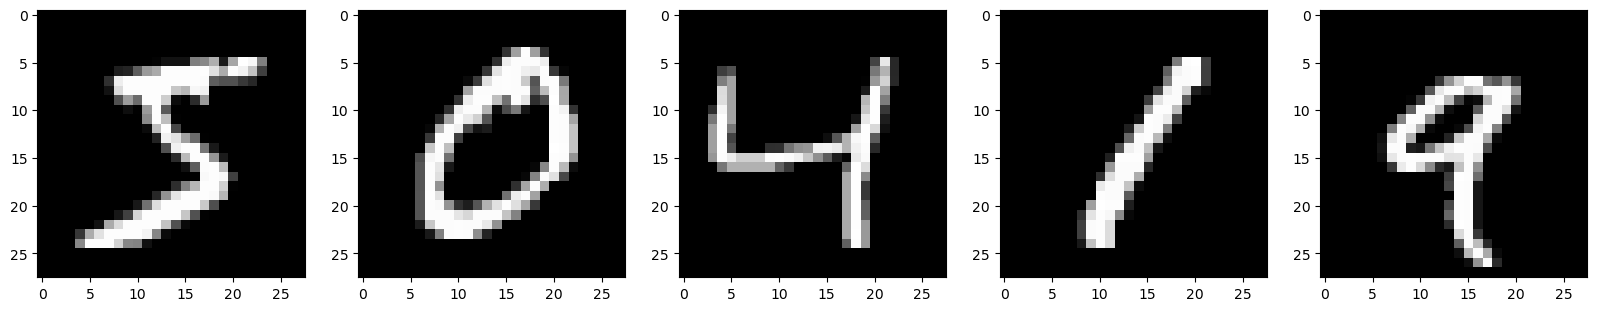

In [22]:
#how does our data looks like
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n ,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

In [23]:
#nomalize - 0,1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [24]:
#28 * 28 = 784
#flatten the image
x_train = x_train.reshape((x_train.shape[0],28 * 28))
x_test = x_test.reshape((x_test.shape[0],28 * 28))

In [25]:
x_train.shape

(60000, 784)

In [26]:
# a = [[1,2,3,4,5,],['a','b','c','d','e']]
# a[0]

In [27]:
encoding_dim = 32        #This is the bottleneck layer, 

In [29]:
#input layer, input placeholder
input_img = Input(shape=(784,))

In [30]:
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [31]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3812 - val_loss: 0.1939
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1834 - val_loss: 0.1551
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1507 - val_loss: 0.1344
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1323 - val_loss: 0.1218
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1204 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1127 - val_loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1070 - val_loss: 0.1027
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1031 - val_loss: 0.0996
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0982 - val_loss: 0.0958
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0968 - val_loss: 0.0947
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [32]:
encoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


In [43]:
len(encoded_imgs[4])

784

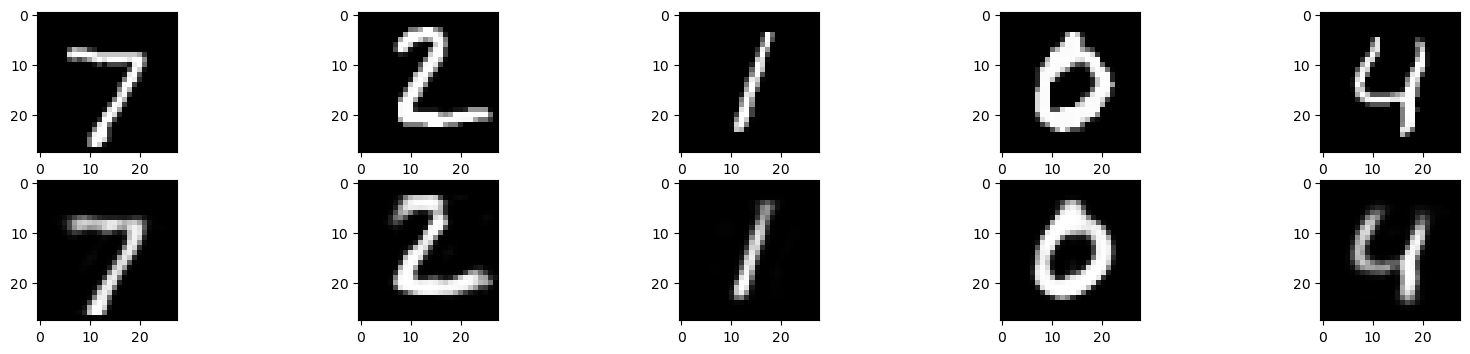

In [37]:
#how does our data looks like
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #display original data
    ax = plt.subplot(2, n ,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    
    #display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    